In [3]:
import pandas as pd
import sns
import train
import holidays

df = pd.read_csv('cleaneddataxxx.csv')
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt
de_holidays = holidays.Germany(prov='NW')
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
import warnings


/var/folders/_4/yzd4h3k95051tj7kpg425rk80000gn/T/ipykernel_1726/2549309988.py:6: DtypeWarning: Columns (11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaneddataxxx.csv')



--- Step 2: Data Preparation & Exploration ---


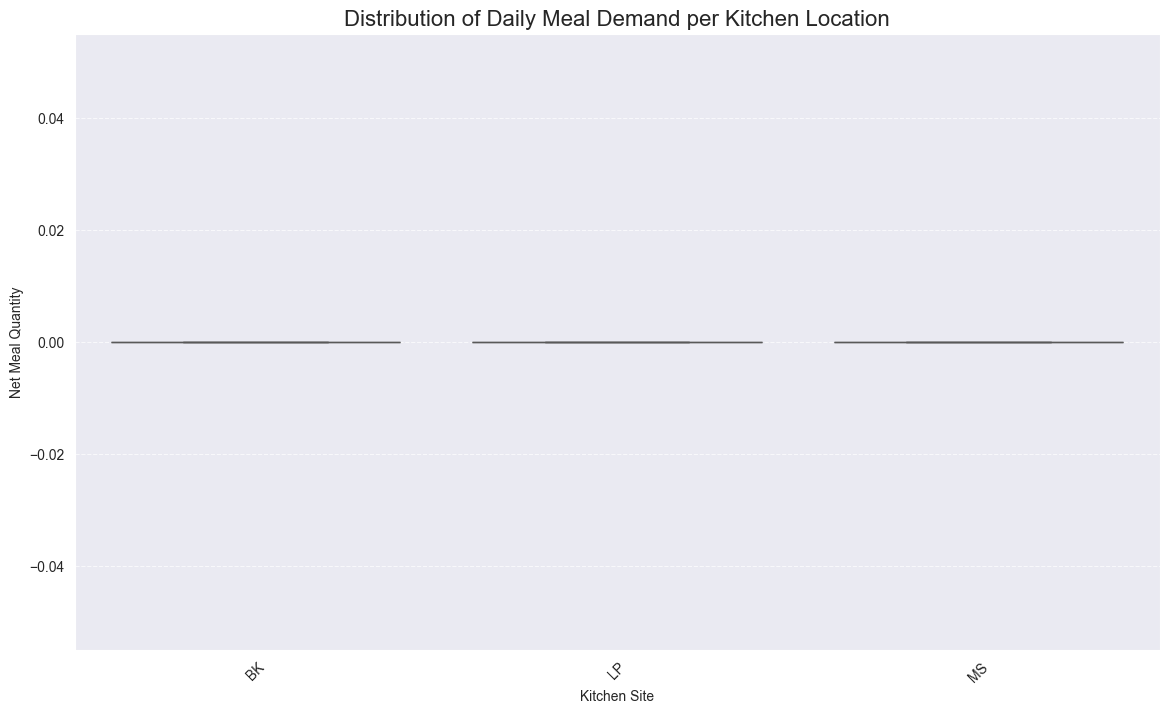

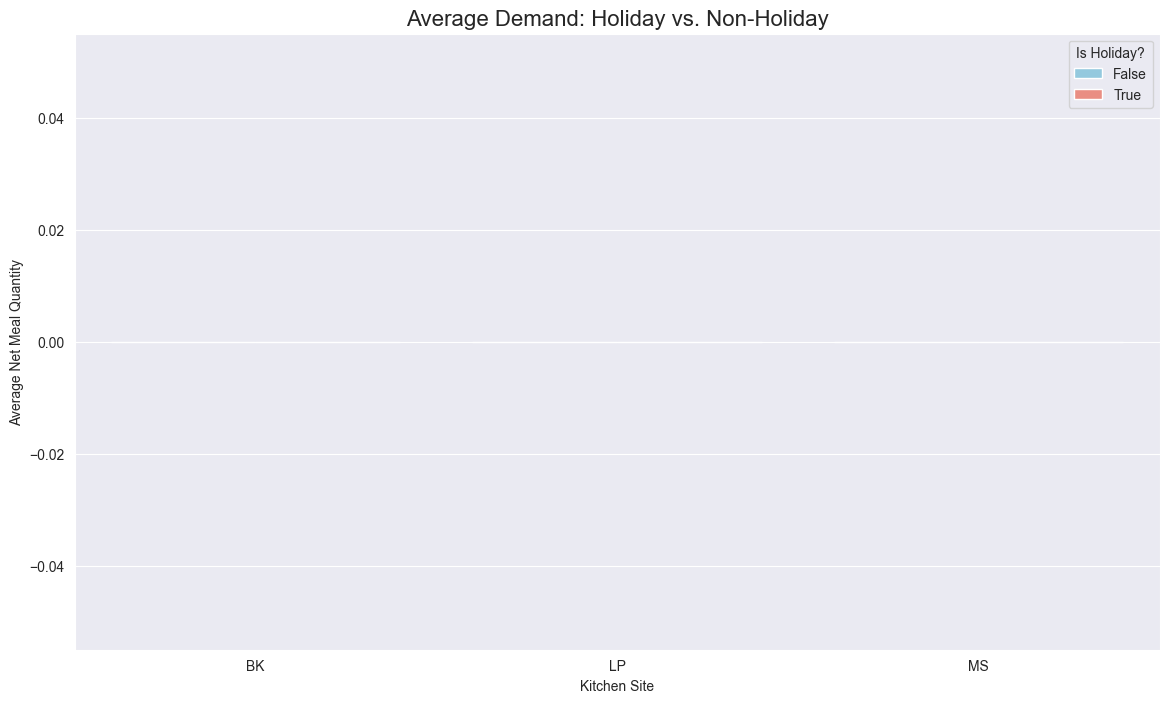


--- End of Step 2 ---
--------------------------------------------------

--- Steps 3 & 4: Per-Kitchen Modeling & Evaluation ---

--- Processing Kitchen: BK ---
  Training for horizon: 1_Day_Ahead
    - Avg. Asymmetric Loss: 0.00
  Training for horizon: 2-5_Days_Ahead
    - Avg. Asymmetric Loss: 0.00
  Training for horizon: 6-10_Days_Ahead
    - Avg. Asymmetric Loss: 0.00

--- Processing Kitchen: LP ---
  Training for horizon: 1_Day_Ahead
    - Avg. Asymmetric Loss: 0.00
  Training for horizon: 2-5_Days_Ahead
    - Avg. Asymmetric Loss: 0.00
  Training for horizon: 6-10_Days_Ahead
    - Avg. Asymmetric Loss: 0.00

--- Processing Kitchen: MS ---
  Training for horizon: 1_Day_Ahead
    - Avg. Asymmetric Loss: 0.00
  Training for horizon: 2-5_Days_Ahead
    - Avg. Asymmetric Loss: 0.00
  Training for horizon: 6-10_Days_Ahead
    - Avg. Asymmetric Loss: 0.00

--- Visualizing Feature Importances for Demand Forecast Models ---


/var/folders/_4/yzd4h3k95051tj7kpg425rk80000gn/T/ipykernel_1726/354750669.py:194: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importances, palette='cividis')


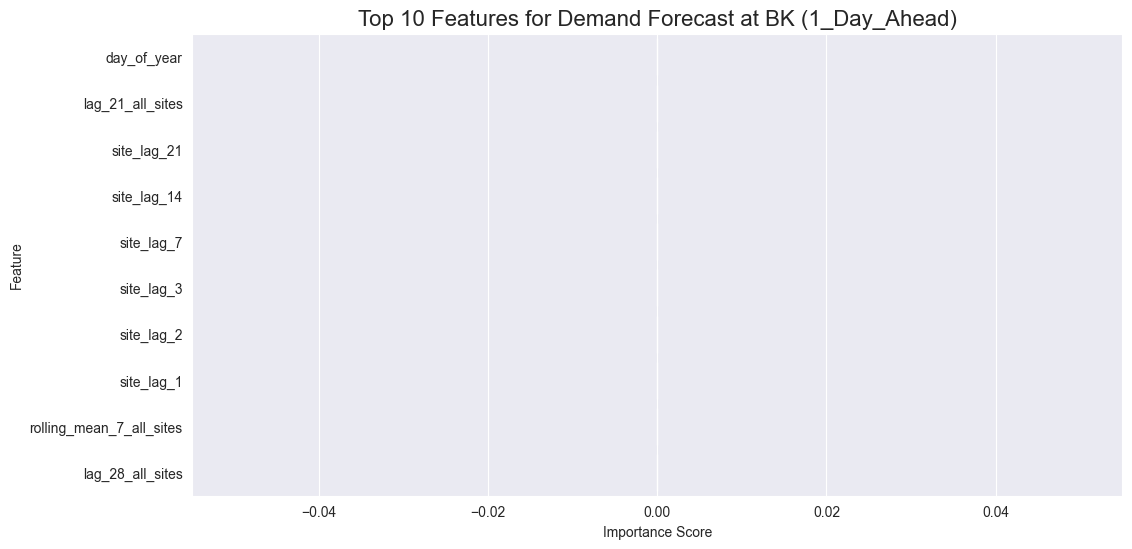

/var/folders/_4/yzd4h3k95051tj7kpg425rk80000gn/T/ipykernel_1726/354750669.py:194: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importances, palette='cividis')


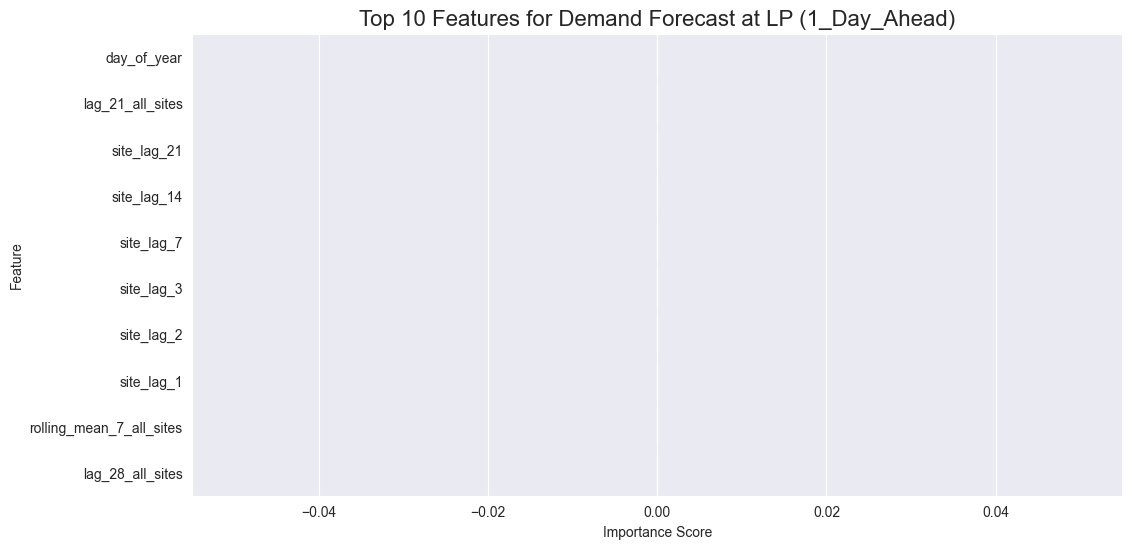

/var/folders/_4/yzd4h3k95051tj7kpg425rk80000gn/T/ipykernel_1726/354750669.py:194: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importances, palette='cividis')


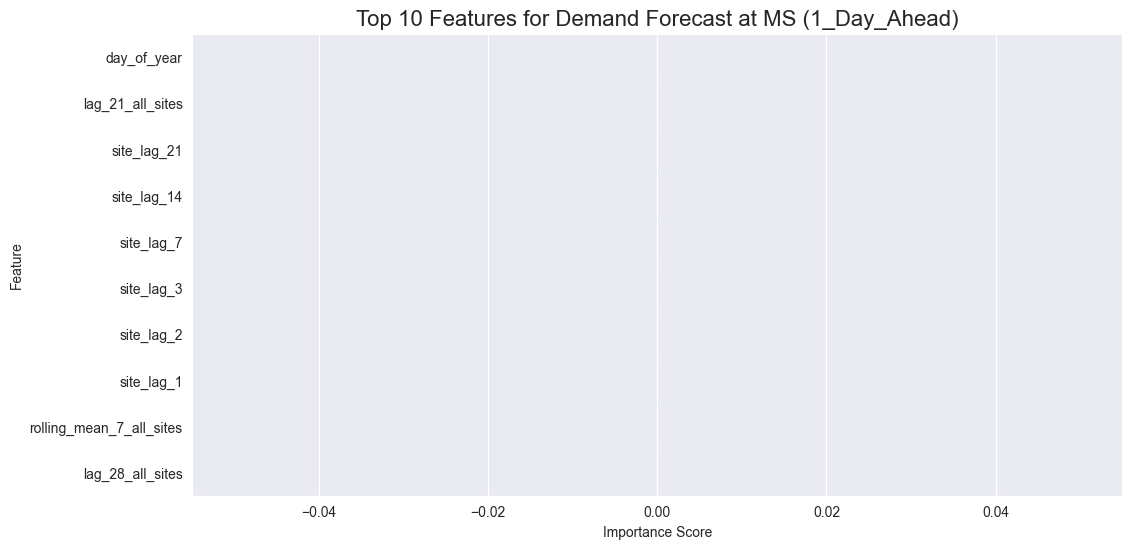


--- End of Steps 3 & 4 ---
--------------------------------------------------

--- Step 5: Detailed Model Evaluation ---


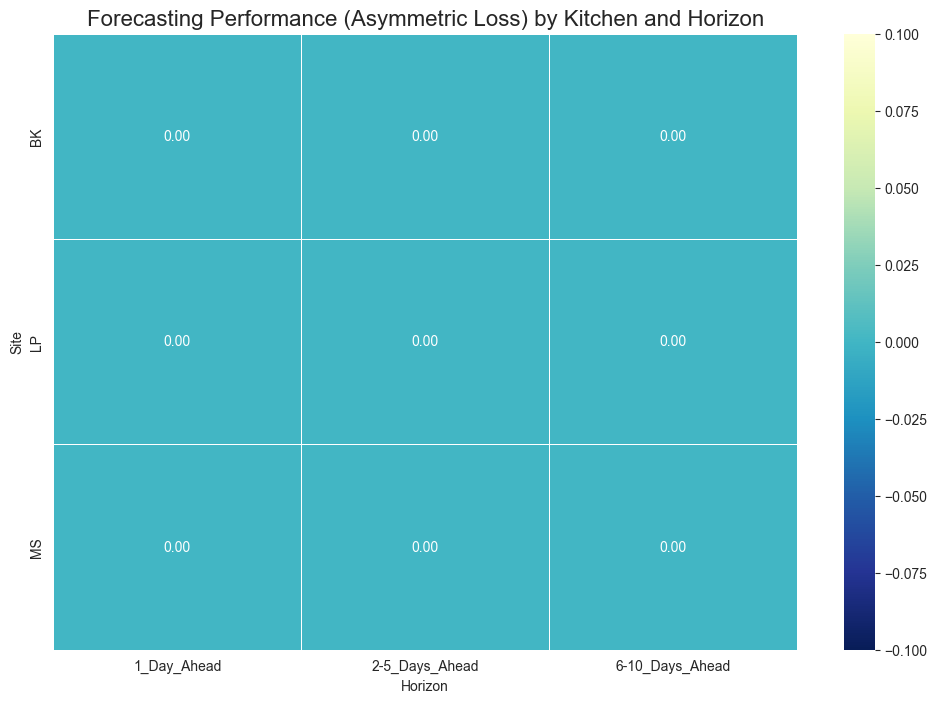


Applying a 5% safety buffer to all predictions.


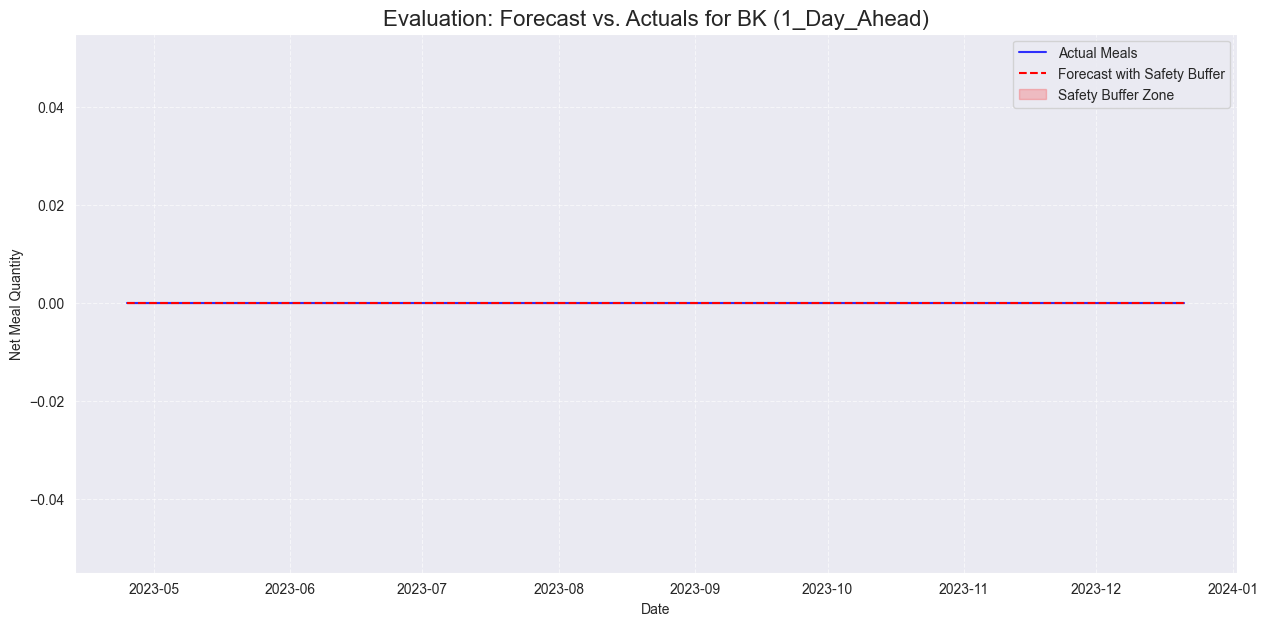

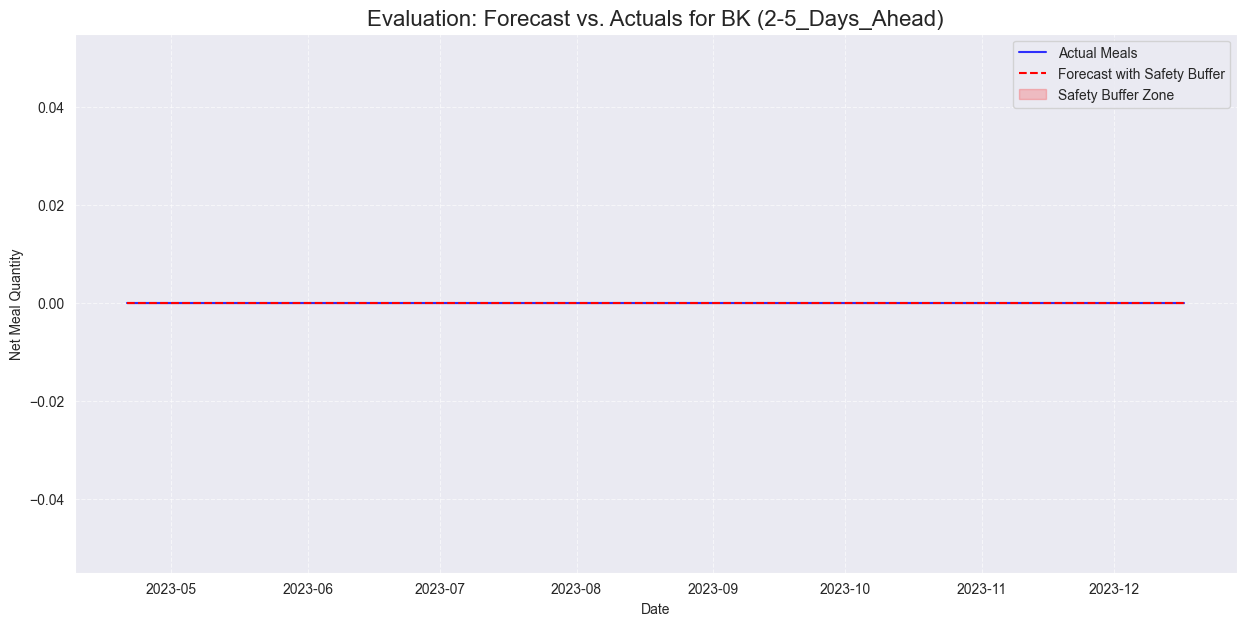

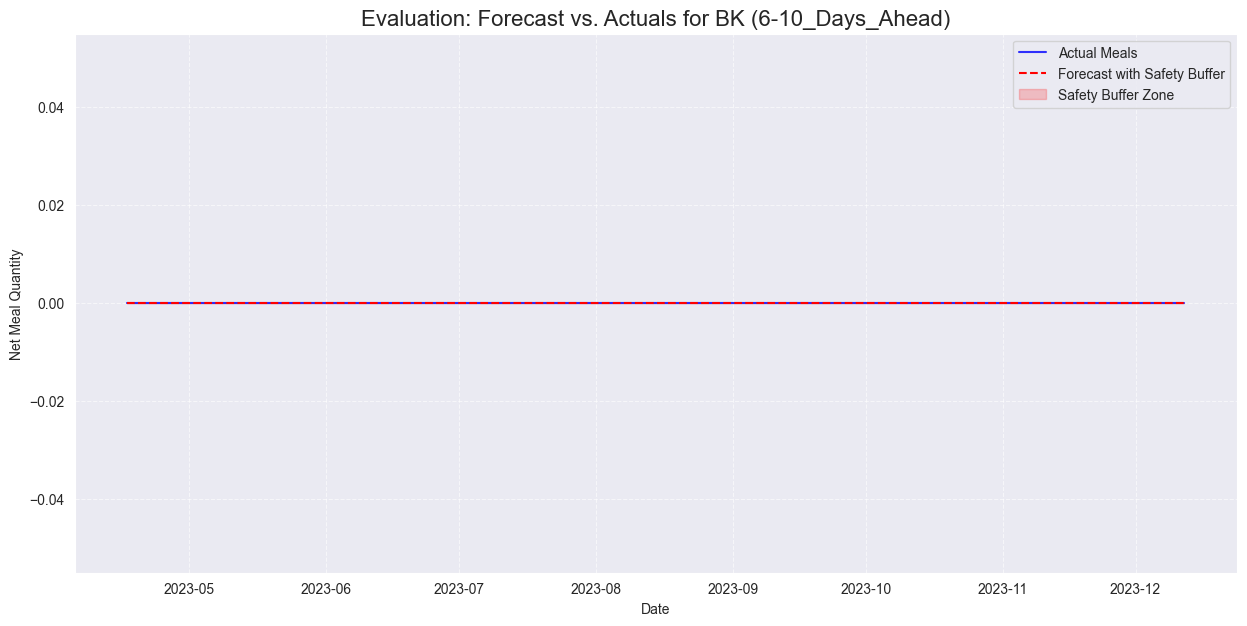

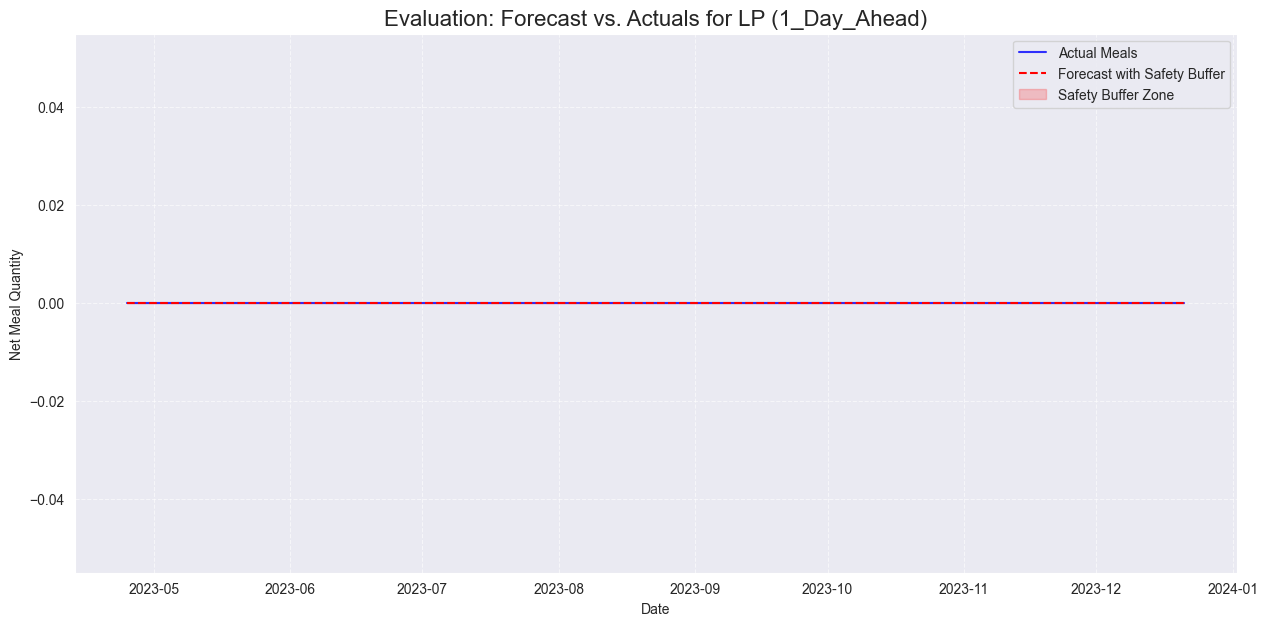

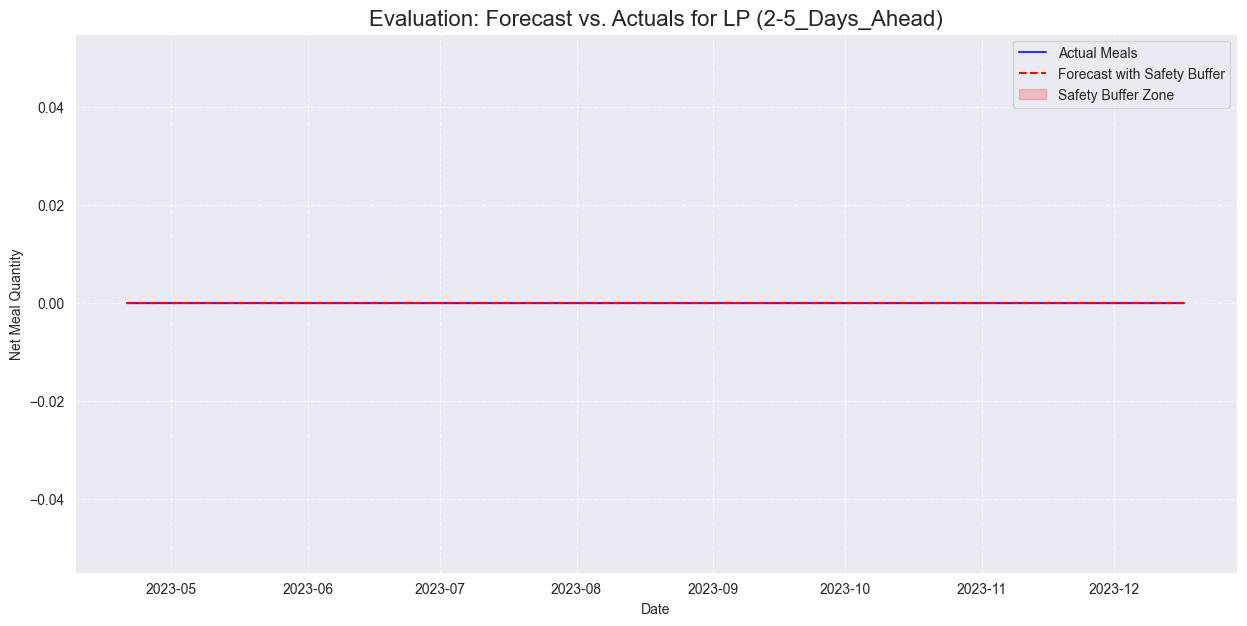

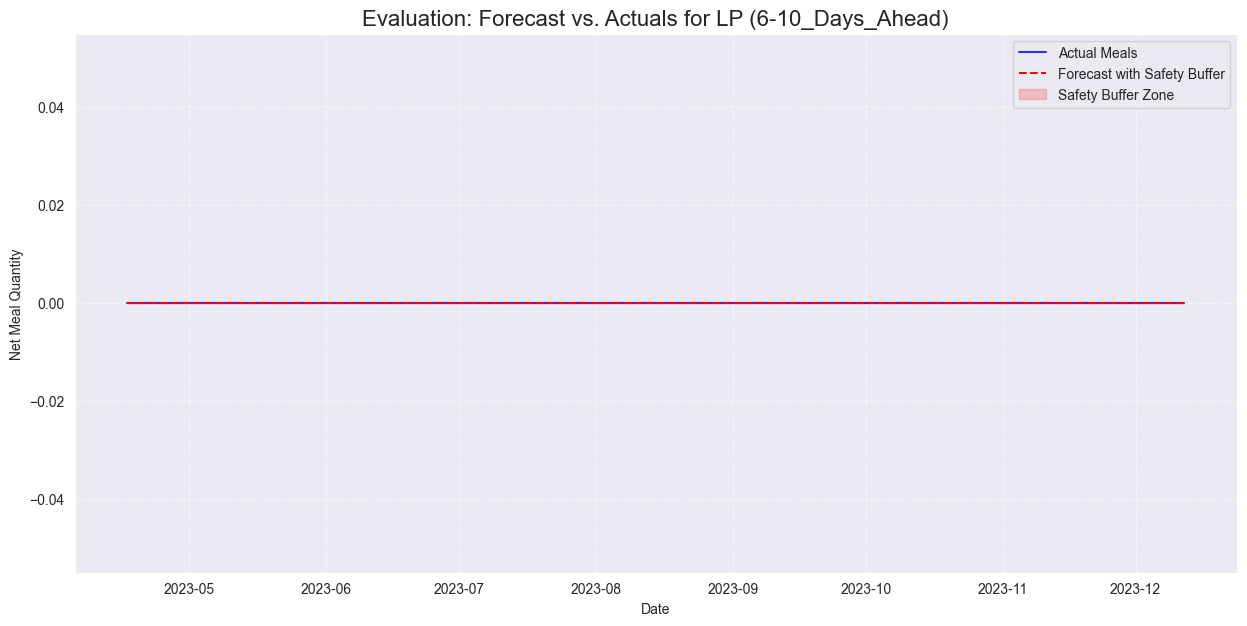

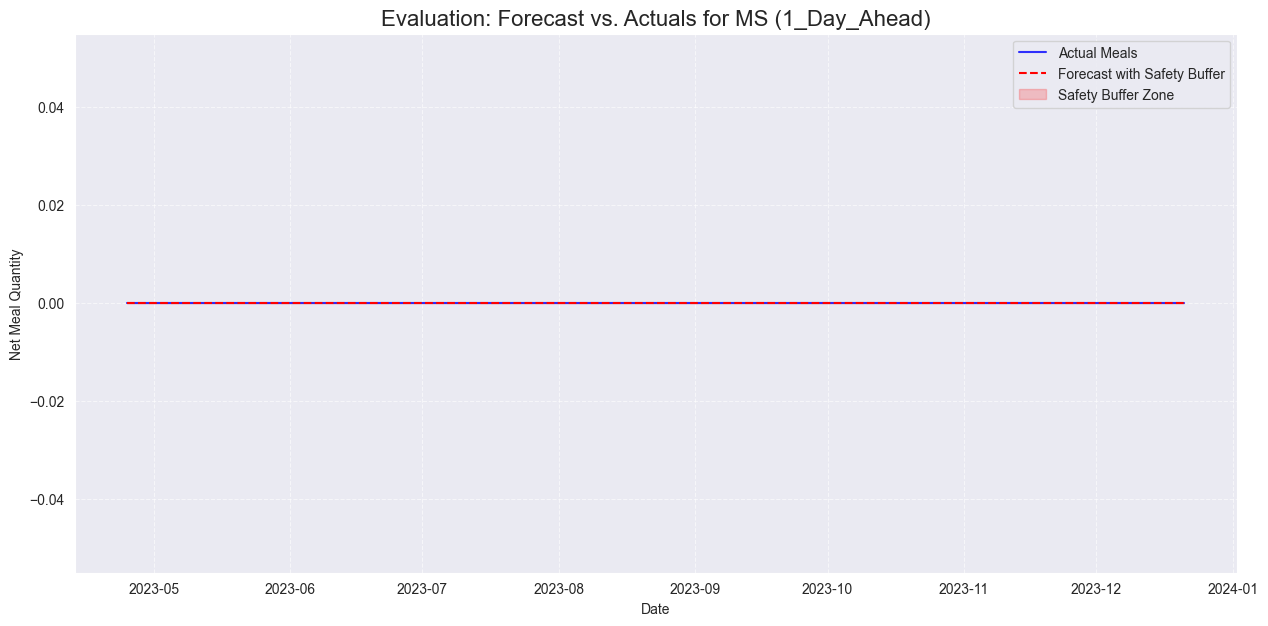

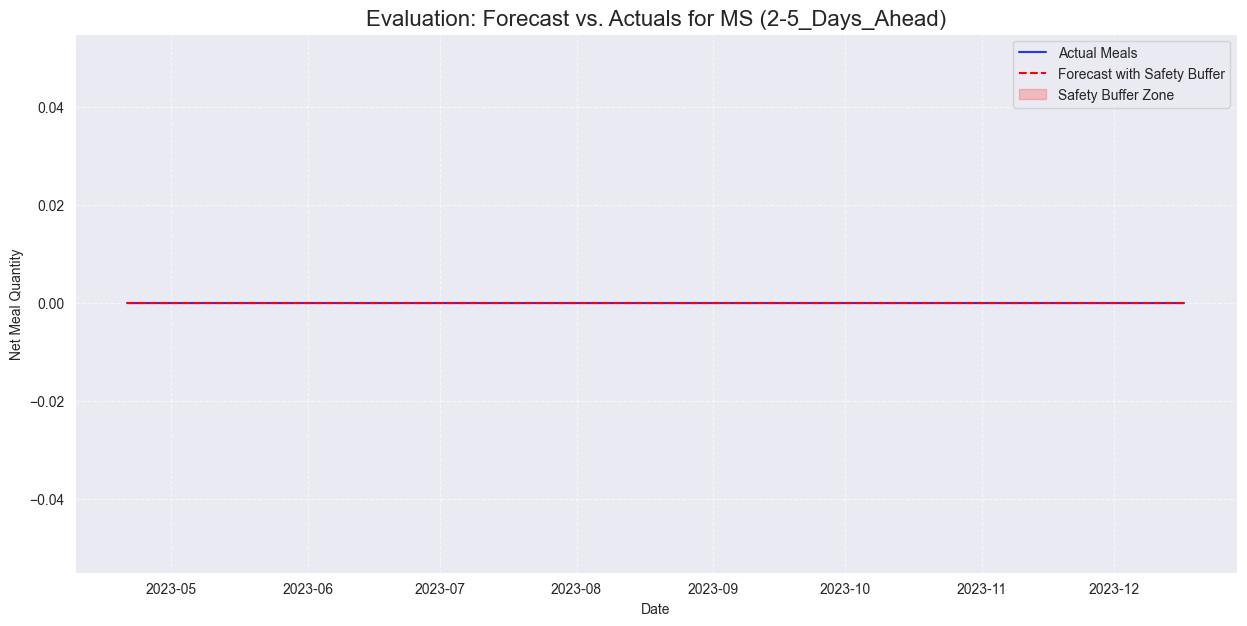

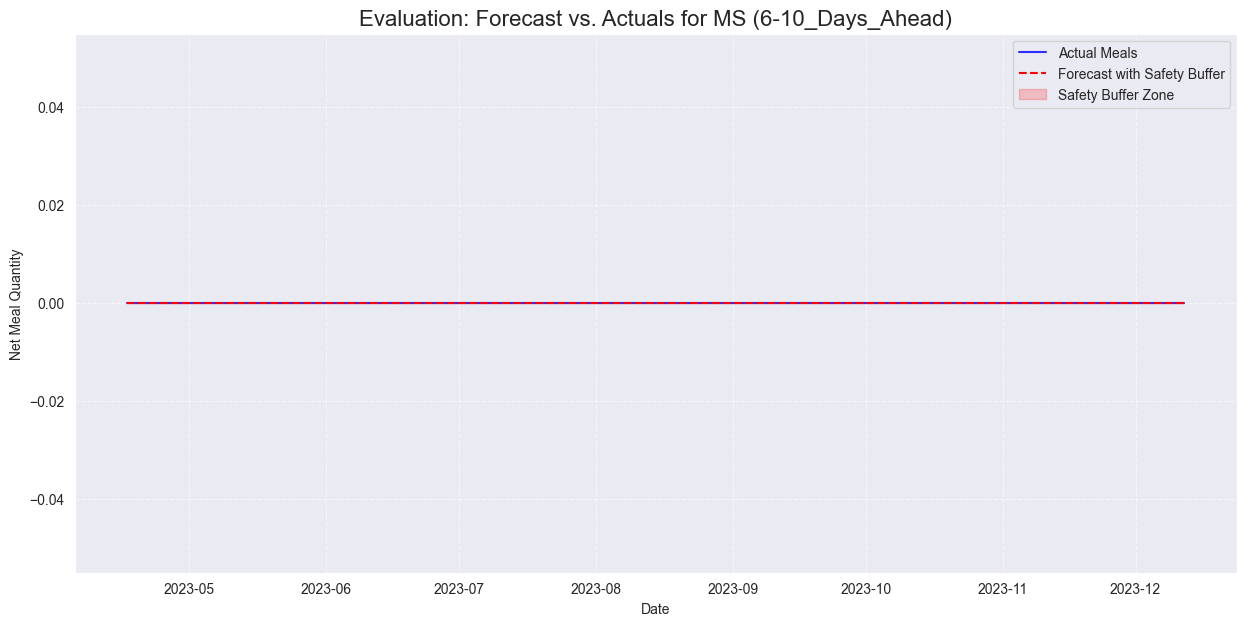

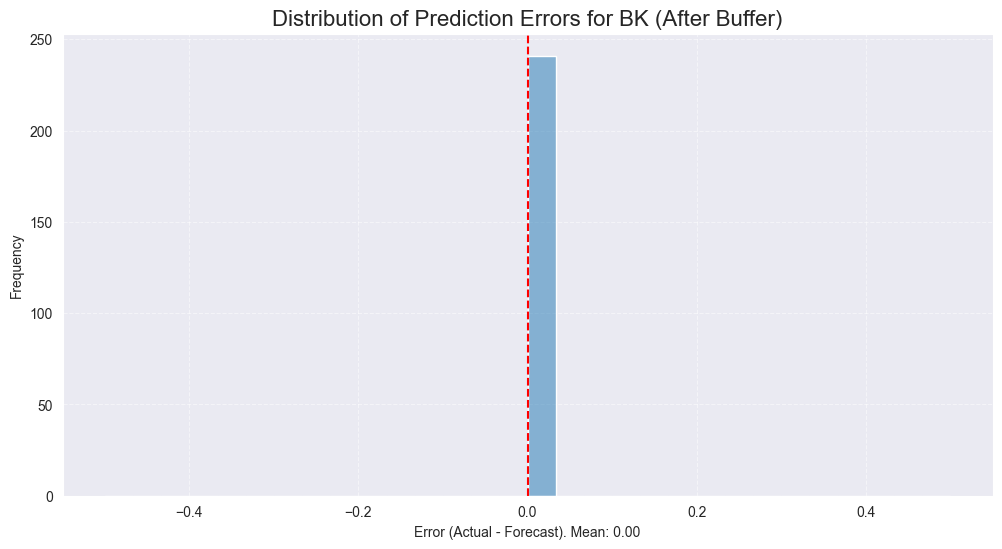

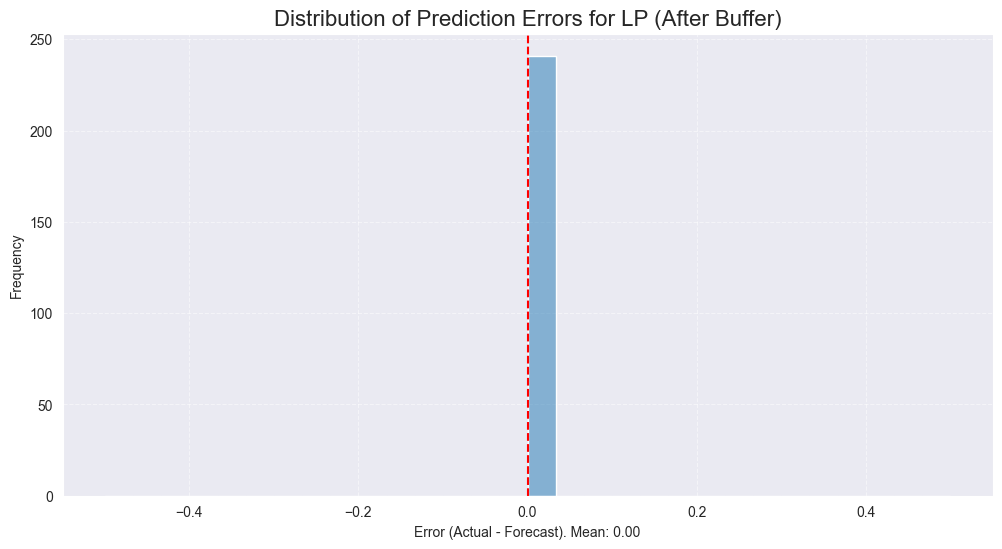

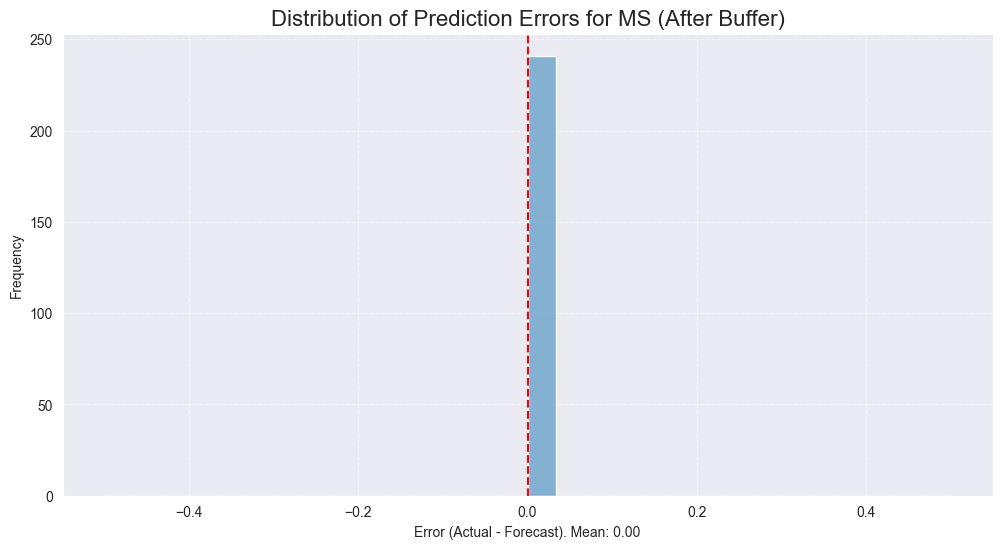


--- End of Step 5 ---
--------------------------------------------------

--- Step 6: Generating 14-Day Future Forecasts ---
  Generating forecast for BK...
  Generating forecast for LP...
  Generating forecast for MS...

--- Final 14-Day Meal Preparation Forecast (Meals to Prepare) ---
            BK  LP  MS
Date                  
2023-12-23   0   0   0
2023-12-24   0   0   0
2023-12-25   0   0   0
2023-12-26   0   0   0
2023-12-27   0   0   0
2023-12-28   0   0   0
2023-12-29   0   0   0
2023-12-30   0   0   0
2023-12-31   0   0   0
2024-01-01   0   0   0
2024-01-02   0   0   0
2024-01-03   0   0   0
2024-01-04   0   0   0
2024-01-05   0   0   0


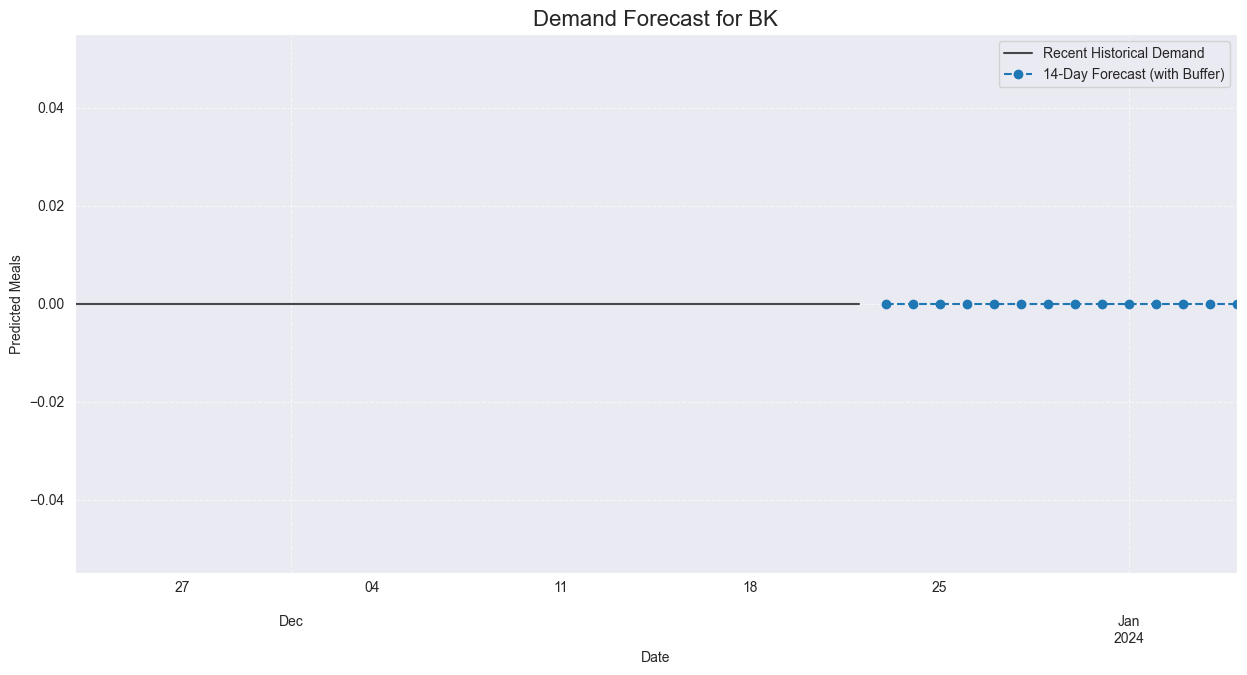

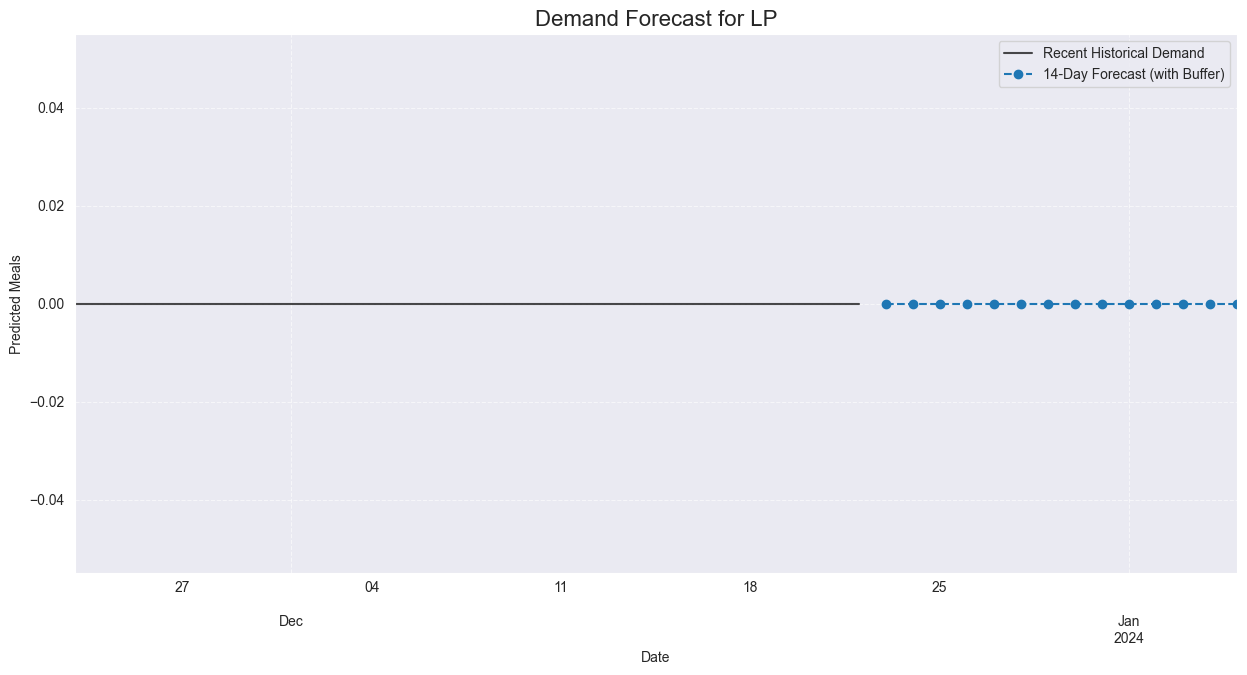

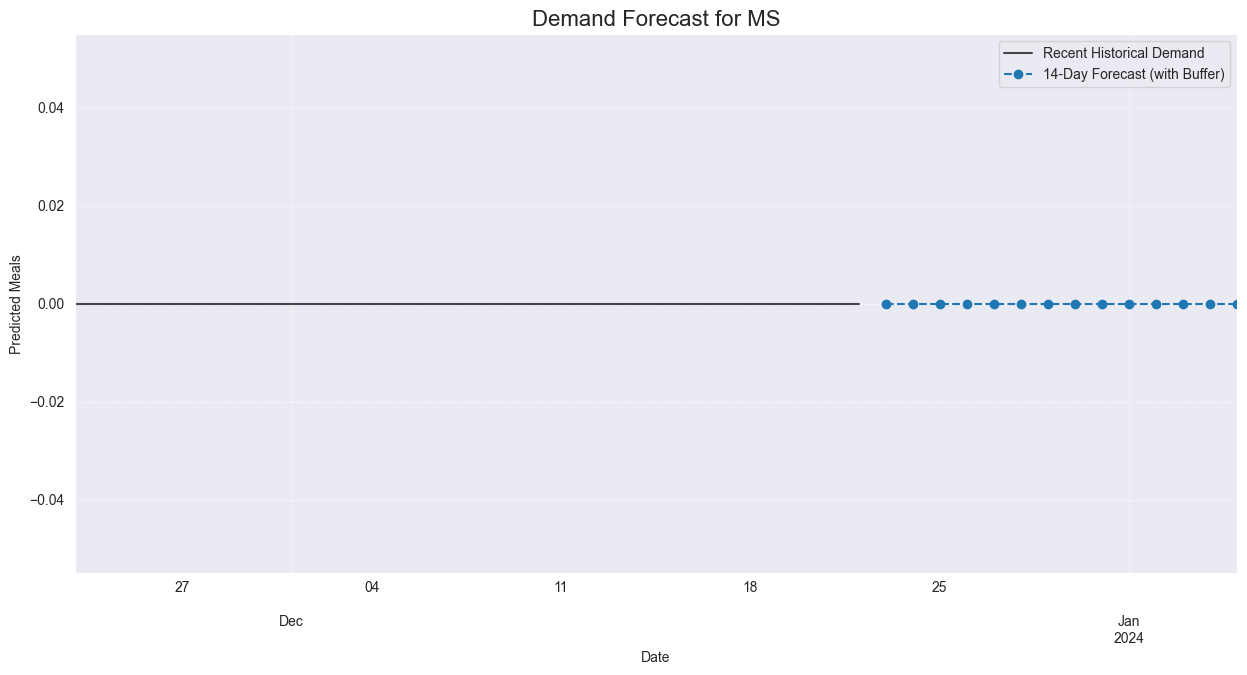


--- End of Process ---


In [5]:



# --- 1. CANCELLATION PREDICTION ANALYSIS ---
# This section remains largely the same, as its purpose is to create the 'net_qty' used later.
print("\n--- Step 1: Cancellation Prediction Analysis ---")
df['is_canceled'] = (df['CanceledQty'] > 0).astype(int)
cancel_features = [
    'MenuPrice', 'MenuSubsidy', 'subsidy_pct', 'day_of_year', 'weekday',
    'is_weekend', 'sin_doy', 'cos_doy', 'month', 'quarter', 'is_month_end',
    'is_month_start', 'order_hour', 'morning', 'afternoon', 'evening',
    'hist_cancel_rate', 'is_holiday'
]
X_cancel = df[cancel_features].copy().fillna(0)
y_cancel = df['is_canceled']

split_index = int(len(df) * 0.8)
X_train_c, X_test_c = X_cancel[:split_index], X_cancel[split_index:]
y_train_c, y_test_c = y_cancel[:split_index], y_cancel[split_index:]

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_classifier.fit(X_train_c, y_train_c)
y_pred_c = rf_classifier.predict(X_test_c)

# Visualization 1.1: Feature Importance for Cancellations
feature_importances = pd.DataFrame({
    'feature': cancel_features,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10), palette='viridis')
plt.title('Top 10 Features Driving Cancellations', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Visualization 1.2: Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_c)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Cancellation Model Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("Classification Report:\n", classification_report(y_test_c, y_pred_c))
print("\n--- End of Step 1 ---")
print("-" * 50)




# --- 2. DATA PREPARATION & EXPLORATORY VISUALIZATION ---
print("\n--- Step 2: Data Preparation & Exploration ---")
# Aggregate data to Site-Day level and pivot
daily_demand = df.groupby(['DateOfService', 'Site'], observed=False)['net_qty'].sum().reset_index()
pivot_demand = daily_demand.pivot(index='DateOfService', columns='Site', values='net_qty').fillna(0)
full_date_range = pd.date_range(start=pivot_demand.index.min(), end=pivot_demand.index.max(), freq='D')
pivot_demand = pivot_demand.reindex(full_date_range, fill_value=0)

# --- NEW VISUALIZATION 2.1: DEMAND DISTRIBUTION PER KITCHEN ---
# WHY: This plot shows the demand profile for each kitchen. You can quickly
# see which kitchens have higher demand, more variability, or more outliers.
plt.figure(figsize=(14, 8))
sns.boxplot(data=pivot_demand, palette='Set2')
plt.title('Distribution of Daily Meal Demand per Kitchen Location', fontsize=16)
plt.ylabel('Net Meal Quantity')
plt.xlabel('Kitchen Site')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- NEW VISUALIZATION 2.2: HOLIDAY VS. NON-HOLIDAY DEMAND ---
# WHY: This helps to quantify the impact of holidays on meal demand for each
# kitchen, which is a key factor in accurate forecasting.
holiday_impact_data = pivot_demand.copy()
holiday_impact_data['is_holiday'] = holiday_impact_data.index.to_series().apply(lambda x: x in de_holidays)
melted_data = holiday_impact_data.melt(id_vars=['is_holiday'], var_name='Site', value_name='Demand')
plt.figure(figsize=(14, 8))
sns.barplot(x='Site', y='Demand', hue='is_holiday', data=melted_data, palette={True: 'salmon', False: 'skyblue'})
plt.title('Average Demand: Holiday vs. Non-Holiday', fontsize=16)
plt.ylabel('Average Net Meal Quantity')
plt.xlabel('Kitchen Site')
plt.legend(title='Is Holiday?')
plt.show()

# Feature Engineering
time_features = pd.DataFrame(index=pivot_demand.index)
time_features['day_of_year'] = time_features.index.dayofyear
time_features['weekday'] = time_features.index.weekday
time_features['is_weekend'] = (time_features.index.weekday >= 5).astype(int)
time_features['month'] = time_features.index.month
time_features['quarter'] = time_features.index.quarter
time_features['sin_doy'] = np.sin(2 * np.pi * time_features['day_of_year'] / 365.25)
time_features['cos_doy'] = np.cos(2 * np.pi * time_features['day_of_year'] / 365.25)
time_features['is_holiday'] = time_features.index.to_series().apply(lambda x: int(x in de_holidays))

# Create lag and rolling features
for lag in [1, 7, 14, 21, 28]:
    time_features[f'lag_{lag}_all_sites'] = pivot_demand.shift(lag).mean(axis=1)
time_features['rolling_mean_7_all_sites'] = time_features['lag_1_all_sites'].rolling(window=7).mean()
time_features = time_features.fillna(0)

# Create Target Variables for each horizon
targets_1_day = pivot_demand.shift(-1)
targets_2_5_days = pivot_demand.rolling(window=4, min_periods=1).mean().shift(-5)
targets_6_10_days = pivot_demand.rolling(window=5, min_periods=1).mean().shift(-10)
target_dfs = {
    '1_Day_Ahead': targets_1_day,
    '2-5_Days_Ahead': targets_2_5_days,
    '6-10_Days_Ahead': targets_6_10_days,
}
print("\n--- End of Step 2 ---")
print("-" * 50)





# --- 3. & 4. ROBUST MODELING & EVALUATION PER KITCHEN ---
print("\n--- Steps 3 & 4: Per-Kitchen Modeling & Evaluation ---")
tscv = TimeSeriesSplit(n_splits=5)
sites = pivot_demand.columns
models = {}
evaluation_results = []
all_test_sets = {}

# --- CHANGE 1: EXPLAINING THE ASYMMETRIC LOSS FUNCTION ---
# WHY: This custom loss function directly addresses your business rule. It penalizes
# under-prediction (y_true < y_pred) 1.5 times more heavily than over-prediction.
# This makes the model inherently try to avoid preparing too few meals.
def asymmetric_loss(y_true, y_pred):
    errors = y_true - y_pred
    # Penalize under-predictions (errors > 0) more
    loss = np.where(errors > 0, errors**2 * 1.5, errors**2)
    return np.sqrt(np.mean(loss))

for site in sites:
    print(f"\n--- Processing Kitchen: {site} ---")
    models[site] = {}
    all_test_sets[site] = {}

    site_features = time_features.copy()
    for lag in [1, 2, 3, 7, 14, 21]:
        site_features[f'site_lag_{lag}'] = pivot_demand[site].shift(lag)
    site_features['site_rolling_mean_7'] = pivot_demand[site].shift(1).rolling(window=7).mean()
    site_features = site_features.fillna(0)

    for horizon_name, target_df in target_dfs.items():
        print(f"  Training for horizon: {horizon_name}")
        y_series = target_df[site]
        temp_df = pd.concat([site_features, y_series.rename('target')], axis=1).dropna()
        X = temp_df.drop('target', axis=1)
        y = temp_df['target']

        if len(X) < 10: # Skip if not enough data
            print(f"    - Skipping {horizon_name} due to insufficient data.")
            continue

        # Train final model on all available data for this site/horizon
        final_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, min_samples_leaf=3)
        final_model.fit(X, y)
        models[site][horizon_name] = {
            'model': final_model,
            'features': X.columns.tolist()
        }

        # Evaluate using TimeSeriesSplit
        fold_scores = []
        for i, (train_index, test_index) in enumerate(tscv.split(X)):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            y_pred = final_model.predict(X_test)
            fold_scores.append(asymmetric_loss(y_test, y_pred))
            if i == tscv.n_splits - 1:
                all_test_sets[site][horizon_name] = {'y_test': y_test, 'y_pred': y_pred}

        avg_loss = np.mean(fold_scores)
        evaluation_results.append({'Site': site, 'Horizon': horizon_name, 'Avg_Asymmetric_Loss': avg_loss})
        print(f"    - Avg. Asymmetric Loss: {avg_loss:.2f}")

# --- NEW VISUALIZATION 4.1: FORECASTING FEATURE IMPORTANCE PER KITCHEN ---
# WHY: This shows which factors are most important for predicting demand at EACH
# specific kitchen. You might find that `weekday` is critical for one kitchen,
# while historical `lag` values are more important for another.
print("\n--- Visualizing Feature Importances for Demand Forecast Models ---")
for site in models:
    # We will visualize the importance for the most critical forecast: 1_Day_Ahead
    horizon_to_plot = '1_Day_Ahead'
    if horizon_to_plot in models[site]:
        model_info = models[site][horizon_to_plot]
        importances = pd.DataFrame({
            'feature': model_info['features'],
            'importance': model_info['model'].feature_importances_
        }).sort_values('importance', ascending=False).head(10)

        plt.figure(figsize=(12, 6))
        sns.barplot(x='importance', y='feature', data=importances, palette='cividis')
        plt.title(f'Top 10 Features for Demand Forecast at {site} ({horizon_to_plot})', fontsize=16)
        plt.xlabel('Importance Score')
        plt.ylabel('Feature')
        plt.show()

print("\n--- End of Steps 3 & 4 ---")
print("-" * 50)







# --- 5. DETAILED MODEL EVALUATION (WITH SAFETY BUFFER) ---
print("\n--- Step 5: Detailed Model Evaluation ---")
results_df = pd.DataFrame(evaluation_results)

# --- CHANGE 2: CORRECTED HEATMAP & ADDED SAFETY BUFFER ---
# WHY: The original heatmap had a key error. This is now fixed. More importantly,
# we apply and visualize a `safety_buffer`. This is a practical step on top of the
# asymmetric loss, adding a fixed percentage to all predictions to further
# reduce the risk of under-stocking.
if not results_df.empty:
    performance_pivot = results_df.pivot(index='Site', columns='Horizon', values='Avg_Asymmetric_Loss')
    plt.figure(figsize=(12, 8))
    sns.heatmap(performance_pivot, annot=True, fmt=".2f", cmap="YlGnBu_r", linewidths=.5)
    plt.title('Forecasting Performance (Asymmetric Loss) by Kitchen and Horizon', fontsize=16)
    plt.show()

safety_buffer_factor = 1.05 # Add 5% to predictions as a safety net
print(f"\nApplying a {int((safety_buffer_factor-1)*100)}% safety buffer to all predictions.")

for site in all_test_sets:
    for horizon, data in all_test_sets[site].items():
        y_test = data['y_test']
        y_pred_raw = data['y_pred']
        y_pred_buffered = y_pred_raw * safety_buffer_factor

        plt.figure(figsize=(15, 7))
        plt.plot(y_test.index, y_test, label='Actual Meals', color='blue', alpha=0.8)
        plt.plot(y_test.index, y_pred_buffered, label=f'Forecast with Safety Buffer', color='red', linestyle='--')
        plt.fill_between(y_test.index, y_pred_raw, y_pred_buffered, color='red', alpha=0.2, label='Safety Buffer Zone')
        plt.title(f'Evaluation: Forecast vs. Actuals for {site} ({horizon})', fontsize=16)
        plt.xlabel('Date')
        plt.ylabel('Net Meal Quantity')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# --- NEW VISUALIZATION 5.1: ANALYSIS OF PREDICTION ERRORS ---
# WHY: This plot helps you see if the model has a consistent bias. Ideally, errors
# should be centered around zero. If the histogram is skewed, it means the model
# consistently over- or under-predicts, even with the safety buffer.
for site in all_test_sets:
    # Only show for the main 1-day ahead forecast for clarity
    if '1_Day_Ahead' in all_test_sets[site]:
        data = all_test_sets[site]['1_Day_Ahead']
        y_test = data['y_test']
        y_pred_buffered = data['y_pred'] * safety_buffer_factor
        errors = y_test - y_pred_buffered

        plt.figure(figsize=(12, 6))
        sns.histplot(errors, kde=True, bins=30)
        plt.title(f'Distribution of Prediction Errors for {site} (After Buffer)', fontsize=16)
        plt.xlabel(f'Error (Actual - Forecast). Mean: {errors.mean():.2f}')
        plt.ylabel('Frequency')
        plt.axvline(0, color='red', linestyle='--')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()


print("\n--- End of Step 5 ---")
print("-" * 50)


# --- 6. GENERATING & VISUALIZING FUTURE FORECASTS ---
print("\n--- Step 6: Generating 14-Day Future Forecasts ---")
last_date = pivot_demand.index.max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=14, freq='D')
future_forecasts_df = pd.DataFrame(index=future_dates)

for site in models:
    print(f"  Generating forecast for {site}...")
    # We only need the 1-Day Ahead forecast for this table
    horizon = '1_Day_Ahead'
    if horizon in models[site]:
        model_info = models[site][horizon]
        model = model_info['model']
        features_list = model_info['features']

        # Create future features
        full_history_extended = pd.concat([pivot_demand, pd.DataFrame(index=future_dates)])
        future_features = pd.DataFrame(index=future_dates)
        future_features['day_of_year'] = future_features.index.dayofyear
        future_features['weekday'] = future_features.index.weekday
        future_features['is_weekend'] = (future_features.index.weekday >= 5).astype(int)
        future_features['month'] = future_features.index.month
        future_features['quarter'] = future_features.index.quarter
        future_features['sin_doy'] = np.sin(2 * np.pi * future_features['day_of_year'] / 365.25)
        future_features['cos_doy'] = np.cos(2 * np.pi * future_features['day_of_year'] / 365.25)
        future_features['is_holiday'] = future_features.index.to_series().apply(lambda x: int(x in de_holidays))

        # Lag/Rolling for all sites
        for lag in [1, 7, 14, 21, 28]:
            future_features[f'lag_{lag}_all_sites'] = full_history_extended.shift(lag).mean(axis=1).loc[future_features.index]
        future_features['rolling_mean_7_all_sites'] = future_features['lag_1_all_sites'].rolling(window=7, min_periods=1).mean()

        # Lag/Rolling for specific site
        site_history_extended = pd.concat([pivot_demand[site], pd.Series(index=future_dates, dtype='float64')])
        for lag in [1, 2, 3, 7, 14, 21]:
            future_features[f'site_lag_{lag}'] = site_history_extended.shift(lag).loc[future_features.index]
        future_features['site_rolling_mean_7'] = site_history_extended.shift(1).rolling(window=7, min_periods=1).mean().loc[future_features.index]

        future_features = future_features.ffill().bfill().fillna(0)[features_list]

        # Predict, apply buffer, and round up
        raw_predictions = model.predict(future_features)
        buffered_predictions = raw_predictions * safety_buffer_factor
        final_predictions = np.ceil(buffered_predictions).astype(int)
        future_forecasts_df[site] = final_predictions

# --- CHANGE 3: IMPROVED FINAL FORECAST TABLE & VISUALIZATION ---
# WHY: This provides a clear, actionable table of the next 14 days of meal
# forecasts for each kitchen. The accompanying plot shows this forecast in the
# context of recent historical demand.
print("\n--- Final 14-Day Meal Preparation Forecast (Meals to Prepare) ---")
future_forecasts_df.index.name = 'Date'
print(future_forecasts_df.to_string())

for site in future_forecasts_df.columns:
    plt.figure(figsize=(15, 7))
    # Plot historical data
    pivot_demand[site].tail(30).plot(label='Recent Historical Demand', color='black', alpha=0.7)
    # Plot forecasted data
    future_forecasts_df[site].plot(label=f'14-Day Forecast (with Buffer)', linestyle='--', marker='o')
    plt.title(f'Demand Forecast for {site}', fontsize=16)
    plt.ylabel('Predicted Meals')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

print("\n--- End of Process ---")